In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils 
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Shakespeare_data.csv')
df.head(1)
df.shape
df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


In [ ]:
import csv

corpus = []

with open('t8.shakespeare.txt') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)      
    for row in reader:
        corpus.append(row[5])
        
print(len(corpus))
print(corpus[:3])

111396
['ACT I', 'SCENE I. London. The palace.', 'Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others']


In [4]:
import string

def text_cleaner(text):
    text = "".join(car for car in text if car not in string.punctuation).lower()
    text = text.encode("utf8").decode("ascii",'ignore')
    return text

corpus = [text_cleaner(line) for line in corpus]

In [5]:
corpus = corpus[:7500]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
total_words
corpus

['act i',
 'scene i london the palace',
 'enter king henry lord john of lancaster the earl of westmoreland sir walter blunt and others',
 'so shaken as we are so wan with care',
 'find we a time for frighted peace to pant',
 'and breathe shortwinded accents of new broils',
 'to be commenced in strands afar remote',
 'no more the thirsty entrance of this soil',
 'shall daub her lips with her own childrens blood',
 'nor more shall trenching war channel her fields',
 'nor bruise her flowerets with the armed hoofs',
 'of hostile paces those opposed eyes',
 'which like the meteors of a troubled heaven',
 'all of one nature of one substance bred',
 'did lately meet in the intestine shock',
 'and furious close of civil butchery',
 'shall now in mutual wellbeseeming ranks',
 'march all one way and be no more opposed',
 'against acquaintance kindred and allies',
 'the edge of war like an illsheathed knife',
 'no more shall cut his master therefore friends',
 'as far as to the sepulchre of chris

In [6]:
input_sequences =[]

for sentence in corpus:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, 
                                         maxlen=max_sequence_len, 
                                         padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,  516,    4],
       [   0,    0,    0, ...,    0,  140,    4],
       [   0,    0,    0, ...,  140,    4,  319],
       ...,
       [   0,    0,    0, ..., 6755,    1, 6756],
       [   0,    0,    0, ...,    1, 6756, 3054],
       [   0,    0,    0, ..., 6756, 3054,  429]], dtype=int32)

In [8]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = tensorflow.keras.utils.to_categorical(label, num_classes=total_words)

In [13]:
print("Total unique words:", len(word_index))
print("Sample words:", list(word_index.items())[:10])
print("Number of sequences:", len(input_sequences))
print("Sample sequence shape:", input_sequences[0].shape if len(input_sequences) > 0 else "No sequences")
print("Max sequence length:", max_sequence_len)
print("total_words:", total_words)
print("max_sequence_len:", max_sequence_len)
print("predictors shape:", predictors.shape)
print("label shape:", label.shape)

Total unique words: 6756
Sample words: [('the', 1), ('and', 2), ('of', 3), ('i', 4), ('to', 5), ('a', 6), ('my', 7), ('in', 8), ('that', 9), ('you', 10)]
Number of sequences: 49008
Sample sequence shape: (54,)
Max sequence length: 54
total_words: 6757
max_sequence_len: 54
predictors shape: (49008, 53)
label shape: (49008, 6757)


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len - 1))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(100))
model.add(SimpleRNN(128))

#model.add(bidirectional(lstm(128)))
model.add(Dropout(0.3))
model.add(Dense(total_words, activation='softmax'))

model.build(input_shape=(None, max_sequence_len - 1))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


C:\Users\shiva\anaconda\envs\new_env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 53, 10)              │          67,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          17,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6757)                │         871,653 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 957,015 (3.65 MB)

 Trainable params: 957,015 (3.65 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
history = model.fit(predictors, label, epochs=50,  verbose=1)

Epoch 1/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.0348 - loss: 7.1430
Epoch 2/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.0486 - loss: 6.7502
Epoch 3/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.0459 - loss: 6.8123
Epoch 4/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.0593 - loss: 6.4604
Epoch 5/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.0668 - loss: 6.2152
Epoch 6/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.0788 - loss: 6.0159
Epoch 7/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.0862 - loss: 5.8434
Epoch 8/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.0934 - loss: 5.6453
Epoch 9/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1011 - loss: 5.4792
Epoch 10/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1087 - loss: 5.2808
Epoch 11/50
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.1195 - loss: 5.1080
Epoch 12

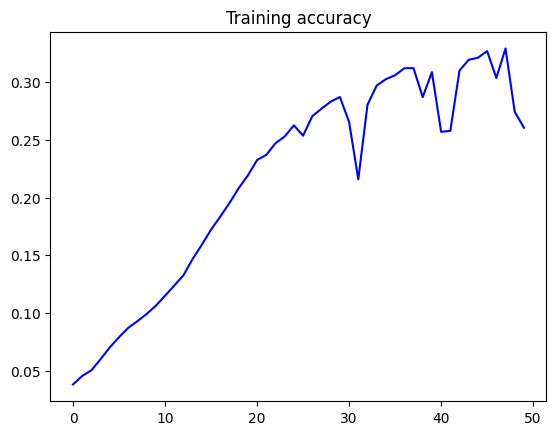

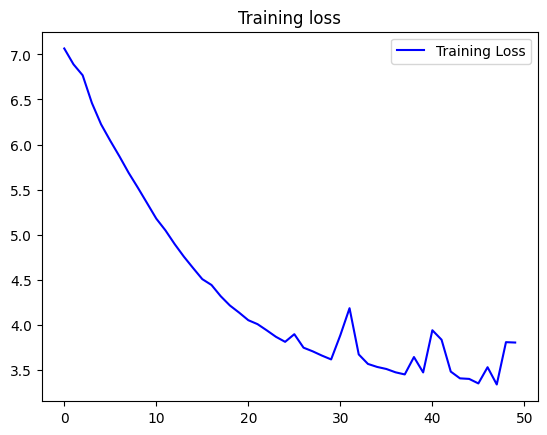

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
#model.save('my_model.keras')

from tensorflow.keras.models import load_model
loaded_model = load_model('my_model.keras')


In [16]:
seed_text = "this is life"
next_words = 50

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted_probs, axis=1)[0]
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    if len(seed_text.split()) % 10 == 0:
        seed_text += '\n'
print(seed_text)

this is life to the crown of the king of
 york and the king of naples and jerusalem and breathe
 near knit the lord of death in the battle of
 the law of france and sicil and by the king
 of england and a thief of the king of death
 and join with
